<a href="https://colab.research.google.com/github/dmshin08/2024-colab/blob/main/neural_network_with_answers_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공 신경망 구조 이해하기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Write neural network code
class NeuralNetwork(nn.Module):

    def __init__(self, input_dim=1, output_dim=1, hidden_dim=1024, num_layers=3):
        super(NeuralNetwork, self).__init__()
        self.input_layer = nn.Linear(input_dim, hidden_dim)
        self.hidden_layers = [
            nn.Linear(hidden_dim, hidden_dim)
            for _ in range(num_layers)
        ]
        self.activation = nn.ReLU()
        self.output_layer = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.input_layer(x)
        x = self.activation(x)
        for layer in self.hidden_layers:
          x = layer(x)
          x = self.activation(x)
        x = self.output_layer(x)
        return x

# Define the network and the loss function.
network = NeuralNetwork()
loss_function = nn.MSELoss() # 평균 제곱 오차 (MSE loss)

# Steps for gradient descent.
# 'lr' stands for learning rate.
optimizer = torch.optim.Adam(network.parameters(), lr=0.001) # 학습률, 파라미터 선언

# Training one step with sample data
x = torch.Tensor([1])
y = x**3 + x**2 - x - 1

optimizer.zero_grad()
output = network(x)
loss = loss_function(y, output)
loss.backward()
optimizer.step()

# Check parameters
parameters = network.input_layer.state_dict()
w = parameters['weight']  # e.g. [-5, -1.2, 1.2, 1.2, 2, 5]
b = parameters['bias']  # e.g. [-7.7, -1.3, 1, -0.2, -1.1, -5]

Loss: 0.264: 100%|██████████| 10000/10000 [01:08<00:00, 146.48it/s]


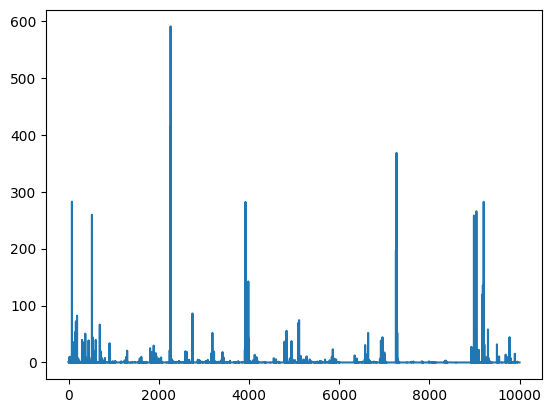

In [ ]:
from tqdm import tqdm
import matplotlib.pyplot as plt

# Define the network and the loss function.
network = NeuralNetwork()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(network.parameters(), lr=0.01)

pbar = tqdm(range(10000), desc="Loss: --")
losses = []
for epoch in pbar:
    x = torch.randn(1)
    y = x**3 + x**2 - x - 1

    optimizer.zero_grad()
    output = network(x)
    loss = loss_function(y, output)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        pbar.set_description(f"Loss: {loss.item():.3f}")

import matplotlib.pyplot as plt
plt.plot(losses)

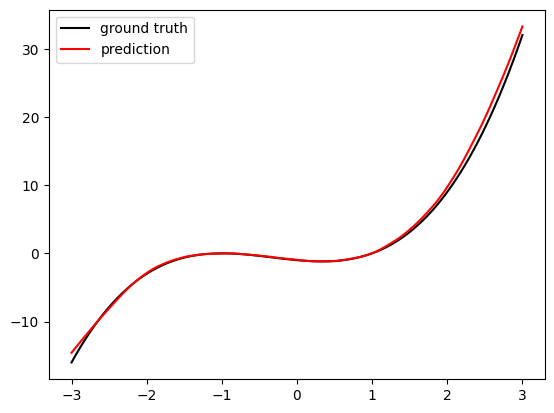

In [ ]:
# plot the result
x_lim = 3
num_points = 100

x = torch.linspace(-x_lim, x_lim, num_points)
y = x**3 + x**2 - x - 1
plt.plot(x, y, label="ground truth", color="black")
plt.plot(x, network(x[:, None]).detach().numpy(), label="prediction", color="red")
plt.legend()
plt.show()